In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import string
import collections
import pickle

In [2]:
def strip_stress(word):
    table = collections.defaultdict(lambda: None)
    table.update({
        ord('é'): 'e',
        ord('ô'): 'o',
        ord('è'): 'e',
        ord('à'): 'a',
        ord('ì'): 'i',
        ord('ù'): 'u',
        ord('\n'): '',
    })
    table.update(dict(zip(map(ord,string.ascii_uppercase), string.ascii_lowercase)))
    table.update(dict(zip(map(ord,string.ascii_lowercase), string.ascii_lowercase)))
    table.update(dict(zip(map(ord,string.digits), string.digits)))
    return word.translate(table,)

In [3]:
def parse_string(word, lang = None, scale = False):
   
    str(word)
    word = strip_stress(word.lower())
    length = len(word)
    LetterFreq={}
    for letter in string.ascii_lowercase:
        LetterFreq[letter] = 0
    for letter in word.lower():
        LetterFreq[letter] += 1
    features = list(LetterFreq.values())
    
    if(length < 1 or scale == False):
        features = [float(x) for x in features]
    else:
        features = [float(x)/length for x in features]
    
    if(lang != None):
        features.append(lang)
    
    return features

In [4]:
with open('english.txt','r') as f:
    for line in f:
        for en in line.split():
           print(en)  

a
abaft
abashing
abbacy
abbreviators
abdominally
aberaeron
aberrations
abhorrently
abingdon
ablation
abnegating
abolition
aborigines
abounding
abrasive
abrogate
abscising
absence
absinthes
absolving
abstain
abstractedness
abstrusely
abuses
abysmally
academics
accelerates
accentuating
accessed
accidentally
acclimatise
accommodatingly
accomplishable
accords
accounted
accra
accruals
accumulative
accuse
acerbates
aches
acid
acidulating
aconite
acquiesce
acquisitive
acridity
acropolises
actinium
activist
actualities
actuating
adage
adaptations
addends
additionally
addressing
adducts
adenomas
adhering
adits
adjournment
adjudications
adjustably
administers
admiralties
admit
admonishment
adopters
adorn
adroitness
adulators
adulteresses
advancements
adventured
adversative
adverts
advisory
aeolians
aerobe
aeronautically
aesthetician
affairs
affeered
affinities
affix
affordability
affrighting
afloat
afro
afternoon
agape
agendas
agglutinates
aggravate
aggressing
agility
agitatedly
agnomina
agonize

UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 1971: character maps to <undefined>

In [5]:
with open('chinese.txt','r') as f:
    for line in f:
        for ch in line.split():
           print(ch) 

pa
bi
ktaming
P
USBshouzhi
ling
xx
liang
nuo
fan
jie
song
xian
bie
meng
zhi
tuo
yiyiduiying
yiliaobailiao
yigejin
yiyuanlun
yiqierujiu
yifanchangtai
yihubainuo
yihuishenglianghuishu
yixi
yirusuoliao
yidingyao
yiji
yidu
yiying
yibayaoshikaiyibasuo
yizhiqianjin
yirizhiya
yipushihan
yidongyixi
yimuyiyang
yiqizhixia
yizhun
yishengyishi
yizhayan
yikong
yichoumozhan
yixian
yitaihua
yibanlaishuo
yixing
yiyan
yiyushuangguan
yijuebuzhen
yibian
yicuozaicuo
yimianzhici
yigulu
yidiandian
dingneizhi
dingzigao
dingchun
qishangbaluo
Qixi
qifang
Qimei
qilingbasui
zhangmu
sanbu
sanrenxing
sangechoupijiang
Sanbajie
sanshiliuji
sanhetu
santiandayu
Sanchakou
sanaotang
sanchun
sanci
sanlu:yixi
sanfasi
Sanlu:e
sandengfen
sanpeicengdongwu
Sanyexingyun
sanjiaoxue
sanjiaotie
sanguijiukou
sansuanganyouzhi
sanpeixiaojie
sanxian
shangxiawen
shangge
shangqu
shanghui
shangxue
Shangdi
shangfangbaojian
shangjia
shangliushehui
ShanghaiQicheGongyeJituan
shanghuo
shangshu
shanggangshangxian
Shangcai
shangke
shangjinxin


fanduidang
fankongzhanzheng
fanpiping
fanying
fanqian
fankongjiang
fanjianting
fanjiao
fantanfu
fansuo
fandang
shuzumu
quqiao
qukuanji
quqian
shouxingren
shouchongruojing
shouqi
shouyi
shoulei
shoufangzhe
shoupian
panjun
congtan
kouwen
koujibiaoyanzhe
Kouhu
kouhuangqin
KoudaiYaoguai
kouyin
Guzhang
gudianwenxue
gucheng
guwangjinlai
gushi
GuerbantongguteShamo
guxi
Gulanjing
guyin
jufa
lingwai
lingqiluzao
koumen
zhiguan
jiaohuan
jiaodao
zhaoji
dingling
kegonghuannan
Keketuohaizhen
kesai
kepa
kelianbaba
kezhipeishouru
kebi
kezhilun
keliebiancailiao
kezhuanzhai
keshi
Taibeishi
Taibi
Taidu
chihe
shice
ShitifuÂ·Jiabosi
Shidifu
youqing
youtan
siyi
Sifabu
SimaFa
chibuliaodouzhezou
chili
chiguansi
chifa
chikunailao
chiruanfan
chixiang
gezhijijian
gejierenshi
song
hehuo
hechizu
hejiahuan
hechengshu
hezhanggua
hefaxing
hezhongguo
heguxian
hezi
helong
Jilie
Jianxian
Jipu
JierboteQundao
Jilandanzhou
diaorlangdang
diaogua
diaolan
diaopu
Tongrentang
tongchaizishang
tongzikuang
tongxin
tongfang
tongyan

wulougengzaolianyeyu
shigu
Pingshanxian
pingzhang
zhanxianbi
zhanzhuan
fei
tudu
lu:zaobuce
cengliu
lu:xijiaocuo
shushi
tunzi
Shanshangxiang
shanqu
shanwaiyoushan
shanluan
shanzha
shanshuishi
shanzhenhaiwei
shanmai
shanxing
shane
shangaoshuichang
ban
Cenxishi
Gangrenboqi
qu
yanjiangyan
Xiuyanxian
Yuechi
Minjiang
xun
Eshanxian
feng
dao
xiawan
Chongan
Chongwenmen
lai
zu
yake
ganglou
Xiao
bengkui
feng
qianru
Tu
chan
qin
xue
Yue
yan
yan
ChuanDianZang
zhouli
xunshi
Chaohushi
gongzuoweiyuanhui
gongzuodui
gongshang
gongliao
gongyequ
gongchengxue
Gongnong
zuobuguo
zuoyoufengyuan
ZuoshiChunqiu
zuojin
qiaokelicuipian
qiaobian
jufu
juxibaobingdu
juliang
WuXia
chayidianr
chadongchilun
chamiu
jimao
yigu
Bazhongshi
Baliwen
Bahama
bashizhan
BabuyanQundao
Balake
Baside
Bakuningzhuyi
Baerduolumao
Baxian
Babeiduo
Baqing
BaliDaxue
jinguoxumei
Shibeiqu
shiwei
shili
Bushi
bunang
BuganweierDao
bufei
bushijunmiao
bugu
Budaizhen
Bulongboge
Bulushijunbing
Xibolaiyu
Xisilun
Xitele
Palijier
pasikasanjiaoxing
Pale

jiyou
rilai
richuerzuo
Rimei
rixinyueyi
riyuechongguang
Ribenliuying
rimo
Rizhilu
rizhen
Riyu
zhiqu
zaohun
zaoqi
zaodao
xunshi
ga
hanba
min
angran
Kunming
shenggao
Changningxian
Changyishi
mingxiuzhandao
mingtian
Mingshan
mingri
MingmoQingchu
mingche
mingzhigufan
mingda
hunyong
yi
yiwan
Yixian
xinian
xingtuan
xingxingzhihuo
xingliudianji
xingdeng
xingyun
yingzhao
chunkun
Chunribu
Chunqiu
chunxing
chunfengdeyi
zuoye
Zhaojue
shilacha
mao
shiguaimingjian
shike
shibi
shizhadan
shizhuang
shichang
shixianshiyin
jinsheng
Jinjiangshi
xiang
wanhui
xian
Wan
chenjian
Pulimaosi
Pula
Pusang
Pumizu
punailuoer
putongzhuque
PutongGaodengXuexiaoZhaoshengQuanguoTongyiKaoshi
Putuoshan
JingningShexiang
Jinghongshi
xi
jingyuan
zhili
ZhiyiShan
liang
yunran
huiying
shuwen
nuanshuiping
anzhongjianshi
anhai
anzhi
anxiangcaozuo
ankui
pu
changtong
zanxi
muguchenzhong
baofu
baolie
baozao
baolongshu
lifa
bao
kuang
kuangda
shaiban
quzi
quchixue
quyi
qumianlun
gengdong
genglou
he
shuminghao
shujia
shumu
shujiao
shux

wuluotuopin
Wuerhe
Wusu
Wuda
Wuluru
Wuqiya
hongshouqi
laoyin
kaopan
tinghuazuoyong
feng
Yanqixian
ju
fenshukengru
wushang
wurenwenjin
wuxinyi
wuzhugan
wuming
wuyin
wuweiyuan
wuxingmaoyi
wuheng
wuwo
wubawo
wuqibie
wujihuaxue
wufawanjiu
wuzhuang
wubingshenyin
wuji
wuzhihua
wuyuanwugu
wujiaoxie
wubiaoqing
wulunhechu
wuyuanfujie
wuguan
wutoucangying
jiaotu
jiaozao
shao
liandanshu
liangang
jiandan
Yantaishi
yanmin
yangang
yanhuafengyue
yantou
shaxingzi
qiong
meiganshi
zhaoli
zhaoming
zhaoxiangji
zhaopian
fanza
baotang
xi
Xiongben
xiongying
yingguangbi
ronghe
xiti
shusi
shuhuang
shushidian
aogengshouye
rechuandao
receng
reai
RebiyaÂ·Kadeer
rechao
reliantielengpigu
relianqiujun
reyin
chan
ranyou
ranxiang
dengzhan
dengcaorong
yu
shaoshuihu
shaohong
shaobing
yanweifu
yanquechutang
menshaoguo
yingjiu
yingmou
yingyangsu
zhuguang
xunrou
baodan
baozhu
baozhen
lujia
lanhaoren
lanzhang
ZhaowaDao
pashu
zhengguang
zhengqiang
zhengchanglunduan
jueshiyue
fumushuangwang
yemen
shuangwaiwai
erge
qiangjiao
p

huanqi
Mian
weixianquan
ti
yijing
gaomanao
xianjie
fengzhui
suoduoansuan
suolu:e
zongshi
zonghengchicheng
zonghuguishan
qiandao
zongjia
zonghuibao
zongshuji
zongjian
zongxian
zongyundan
zongtimubiao
fanzhengboyin
fanyu
bengdai
Miusi
zhibuji
san
raowanr
raoteng
shengtao
jishang
jiaohuo
jishi
jigui
zuan
xubian
chanshou
yingchimu
xianshou
xianyao
fou
quexinyan
quexian
qingshen
guan
ju
zuiren
zuixingleilei
zhixin
zhizhuangfei
fazhan
majie
bachubaijia
LuoShichang
luole
Luofunuo
Luobulinka
luobai
Luomannuo
Luohuqu
Luotianxian
luojing
Luobinxun
Luomashu
YangzhuoYongcuo
yangshuichuanci
yangduzishoujin
yangzhihupi
meibushengshou
Meifen
MeiguoJiaohui
MeiguoDizhiDiaochaju
MeiguoZhengquanJiaoyiWeiyuanhui
meirong
Meidi
MeiOu
Meixi
meilu
MeiYing
Meijun
gaopi
xiukuinandang
qunshan
qunzu
quntixingshijian
yiburongci
yinu:
yifumu
Yima
Xi
yuhua
yuduan
WengyuanXian
lingzi
xiguan
xiti
cui
JianBozan
ao
qiaochu
ao
fanhui
fanban
fanlian
fanbian
yiyi
lao
laobanr
laobantian
laodaniang
laojianjuhua
laoker
laomao

dushangyiju
dudou
Laisuotuo
fu
goumaizhe
Saite
saicheshou
zhuiliu
tan
zanyu
zangkuan
Ganzhou
Chicheng
chishou
chixiongnizhuomuniao
chiluoluo
chijin
he
Hesitiya
Heermosi
zouxiapolu
zouxiangduanceng
zouxing
zoushui
zouxiu
zoufang
zoumenlu
jiu
qilai
qizi
qimofan
qili
qike
qitou
chenhuodajie
chaoqianmiaozhun
chaodu
chaomo
Chaojibei
chaoshengbojiancha
chaolianjie
chaoepeiguquan
Yuenan
Yuewen
Yuexixian
lie
ganmingr
Zhao
ZhaoShuli
Quduoduo
qushi
ZuliYizheng
zuyu
zuliang
zhi
qiwang
diedao
diezhi
pao
paojianghu
paobiao
bozi
genpigu
gentouchong
kuaguohua
kuaxianqiao
guidao
Lujia
Ludeweixi
Luqiao
lucheng
Lutoujinrongcidian
tiaojia
tiaoji
tiaozha
liang
tabanche
taxuexunmei
ju
qie
dian
jujuduxing
jianzhuo
ti
panshan
benggao
cengke
dunmabu
dun
dunchuan
yuejin
lan
nieji
shenshang
shenfenzheng
shenxinjupi
shenduan
shenxianlaoyu
dan
duobi
qu
chedaoshanqianziyoulu
cheba
chechuang
chezaidouliang
chezhen
yahuaji
guijiqiu
junshizhengbian
jungongjiao
junwei
junji
junzhuang
yue
tun
ruankougai
ruanni
ruanmoyi

wuyuan
kui
tengfei
saorao
mode
quyi
bi
jiaosheyinyi
yanguangpeijingfa
yanhuo
jinghu
jingbu
jinghuang
jingjue
jingma
zhoubian
li
guzhe
gubing
gufeihou
guge
touzhong
qia
zangzi
tiwei
tidasijing
tiganwendu
tiwenbiao
tiyuchangguan
tiliang
kuan
GaoXianzhi
gaofenzi
gaofan
gaota
Gaoanshi
gaoceng
gaoan
gaonianjisheng
gaoyang
gaokuang
Gaoliangshi
gaoshenmoce
gaore
gaoqiubei
Gaobeidianshi
gaodengfayuan
gaoweikongjian
gaonengliang
gaochubushenghan
gaochao
Gaoda
Gaolingxian
gaoyinlaba
gaogaoshour
kun
faxing
fagu
fu
songkou
songgao
huci
xuzi
liegou
douniu
naoqu
naofantian
dou
yuyubule
guikulanghao
guilou
guitouguinao
kuishou
meihuo
WeiWei
chimei
mozhang
Modu
yuci
yushuizhihuan
yumizhixiang
yuchuan
yuleixue
dao
Lujun
Ludian
tuo
Baodeliya
qi
xiannai
xianxue
Lichengqu
lai
jingsha
zei
sailie
yong
manli
biejia
linzhuang
shan
eyuyanlei
niaopiaoling
niaojingongcang
niaochongshu
JiushanYoujifu
FenghuangGucheng
Fengqing
fengdieke
mingbuping
yuan
yazuijuanwei
yuanyanghudie
you
yu
Hongzhang
juanxingmu
emaobi


In [6]:
with open('italian.txt','r') as f:
    for line in f:
        for it in line.split():
           print(it) 

a
abbagliai
abbagliero
abbaiata
abbaini
abbaruffare
abbassati
abbassiate
abbattersi
abbattitore
abbellimento
abbellite
abbeverato
abbiente
abbigliate
abbinano
abbinavamo
abbinera
abboccai
abboccavo
abbonarono
abbonavo
abbondata
abbondino
abbordabile
abbozza
abbozzavo
abbracciano
abbreviati
abbrivio
abbronzava
abbrunasse
abbruniamo
abbuiando
abdicassi
abdicherei
abete
abilitammo
abilità
abita
abitato
abituare
abitudinario
abiurammo
abiuravate
abluzioni
abolirai
aboliscono
aboliva
aborriamo
abortito
abraso
abrogativo
abroghino
abusammo
abusava
abusero
accadano
accadeva
accalappiando
accalorando
accampai
accampava
accaniate
accanisco
accanto
accapponarsi
accarezzi
accasarono
accascerai
accasciavi
accatastamento
accattoni
accecante
accecavo
accedervi
accelerate
accelerò
accendisigari
accennati
accentare
accentrava
accentuate
accerchiare
accertarne
accertera
accessibili
accettano
accetterai
acchito
accidentato
accigliati
acciuffato
acclamati
acclimatato
accoglienza
accoltellato
accomodament

cosicché
cosituite
cospargerti
cospirasse
cospirero
costanze
costati
costeggiò
costi
costituita
costituzionalizzate
costretti
costringiamo
costruire
costruissero
costruttivi
cotolette
covasse
covera
cozza
cozzato
cozzeresti
cpu
creano
create
creavi
credenziale
credermi
credeva
creditrice
creeremo
cremarono
cremavate
cremero
creparono
crepavo
crepino
crepitavi
cresce
cresciamo
crespi
criminale
cristalli
critica
crivellai
croato
crollai
crollavano
cromatografo
cronometraggi
cruda
crusche
cucchiaiate
cucinarci
cucinavate
cucirci
cuculi
cullarono
cullavo
cullino
culminato
culti
cuoca
cuoco
curammo
curassi
cure
curiamo
curiosate
curiosità
curvasse
curve
curvo
custodisce
d'accesso
d'anni
d'avanzo
d'essere
d'indirizzo
d'istruzione
d'origine
dabbene
dall
dall'ambiente
dall'aritmetica
dall'azione
dall'espansione
dall'ingilterra
dall'obbligatorietà
dall'uno
dame
dando
dannai
dannava
danneggavi
danneggierai
danniamo
danzante
danzatrici
danzeresti
darai
dargliele
darsena
datano
datavano
dateremo
d

imballati
imbalsamate
imbarazzata
imbarcando
imbarchi
imbianca
imbiondii
imboccare
imbocco
imbottiro
imbracciare
imbratto
imburrasti
imburro
imitata
imiteranno
immagazzinamento
immaginarlo
immaginiamo
immedesimarci
immenso
immerso
immigra
immigrava
immisione
immodificabile
immunitaria
impallidire
imparato
impariate
impasta
impastavo
impauriamo
impauristi
impavidava
impazzite
impedimmo
impediscono
impegna
impegnati
impegno
imperfetta
impermeabile
impetuose
impiccaste
impiega
impiegate
impietrito
implica
implicavo
implora
imploravo
imponenti
importantissimi
importavi
imposero
imposte
imprecare
imprecisata
impresse
imprestate
impreviste
improvvisamente
impugnando
impugnerei
impura
imputassi
imputerei
inadatte
inaffiasse
inaffino
inalberi
inalzassi
inalzeremo
inamidaste
inamidino
inattendibilità
inaugurata
incaglia
incaglio
incalzava
incammino
incantavi
incarcerato
incarnazione
incartavi
incassammo
incasserai
incatenati
incendia
incenerano
incentivare
incerto
incettate
inches
inchinato
inc

piantava
piantino
piattola
piàcquero
picchiano
picchiett
piccolossima
piegarono
piene
pietrifico
pigliala
pigliati
pignorando
pignorerei
pigolaste
pigolerete
pile
piluccando
pilucchino
pinoli
piombano
piombavo
piove
pipes
piscina
pitchaltri
pitturassi
pitturiate
pizza
pizzicata
placc
placcava
placementquesta
plasmai
plasmavano
plastiche
plebe
plico
pluribocciato
pochino
poemi
poichè
polemiche
polinucleari
polizza
polmoni
poltrire
pomice
pompassi
pompelmo
pompino
ponderaste
pondero
ponticello
popolando
popolato
popoliamo
porcellane
porgono
porremo
portando
portasse
portava
porterà
portieri
posando
posava
posdatasti
pose
position
posizionandosi
posseda
possedette
posseggo
possibili
postale
postmoderno
potemmò
potenzialmente
poterne
potestativa
potior
potute
pozioni
pranzasse
pranzerei
praticamente
pratiche
preannunciare
precedemmo
precedette
precetto
precipizi
precisate
precisino
precludeste
precompila
precorso
predano
predavamo
prederebbe
predic
predicatori
predilige
predirete
predispon

scrosciano
scrostano
scrosti
scrutando
scrutavano
scrutinata
scuderia
sculture
scuotine
scusante
scusati
scusereste
sdegnarono
sdegner
sdentate
sdoganati
sdoppiai
sdoppiatori
sdraiati
sebbene
seccati
seccò
secondari
seconde
sedani
sedava
sederai
sedeste
sediate
seduco
segarne
seghettati
segnalano
segnalavi
segnaliate
segnassero
segnavo
segno
segregate
segrete
seguenza
seguirei
seguiscono
seguitassi
seguitiamo
selcer
selciare
selcino
selezionandolo
selezione
sellini
semantici
sembrata
sembrerete
semicerchi
seminaste
seminerei
semiosi
semolino
semplificando
senatori
sensi
sentano
sentimentale
sentireste
sentiscono
sentivi
separano
separatori
separiamo
seppellendo
seppure
sequestrare
serali
serbasti
serberebbe
serenata
serie
serpeggiano
serrai
serrato
serreremo
servendosi
servirà
servitore
sessione
setaccio
settare
settiche
seven
sezionando
sezionerai
sfacchini
sfamassi
sfameranno
sfarzo
sfasciammo
sfasciava
sfavillata
sfebbrate
sfibbiammo
sfibbier
sfibrasti
sfibri
sfidassimo
sfideranno
s

tur
turava
turbasse
turbavate
turbinano
turbinerei
turbolento
turco
turino
turri
tutelavamo
tutor
tuttofare
ubertoso
ubriacate
uccide
uccidesse
ucciso
udirete
udivi
ufficerete
ufficiavi
uggiolare
uggiolino
uguaglier
ulteriormente
ultimavamo
ultimino
ululando
ululavi
umane
umide
umiliaste
umilierete
un'adeguata
un'assoluta
un'energica
un'importanza
un'opzione
unanimita
unendo
uniate
unificare
unifichi
uniformavi
unioni
unisce
unitarietà
universalia
unix
uomo
urbanesimi
urgenti
urlato
urlerò
urtante
urtavi
urtone
usarle
usato
uscirà
uscì
users
ustiona
ustione
usufruirai
usufrutti
usurpassi
usurperete
utilissimi
utilizzarle
utilizzeremo
uxoricidio
vaccinare
vacillammo
vacillerai
vacon
vagammo
vagato
vaghera
vagiate
vagisci
vagivi
vagliato
vagone
vale
valga
valicaste
valichino
vallata
valorizzare
valtellinesi
valutata
valute
valzer
vandalo
vaneggiatore
vangaste
vangherai
vanita
vantammo
vantatori
vanti
vaporosa
varate
varchiamo
variabilità
variassimo
varibili
variera
variopinta
vascini
vas

In [7]:
names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
         'U', 'V', 'W','X', 'Y', 'Z', 'class']

dataset_it = pd.DataFrame((parse_string(word,'Italian') for word in open('italian.txt', encoding = "ISO-8859-1")), columns = names)
dataset_en = pd.DataFrame(([parse_string(word,'English') for word in open('english.txt', encoding = "ISO-8859-1")]), columns=names)
dataset_zh = pd.DataFrame(([parse_string(word,'Chinese') for word in open('chinese.txt', encoding = "ISO-8859-1")]) , columns = names)

In [8]:
dataset = pd.DataFrame()
dataset = dataset.append(dataset_it)
dataset = dataset.append(dataset_en)
dataset = dataset.append(dataset_zh)

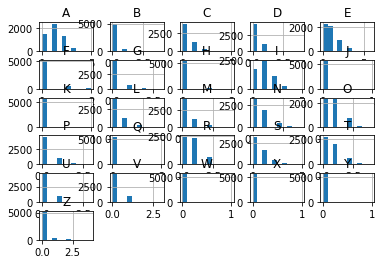

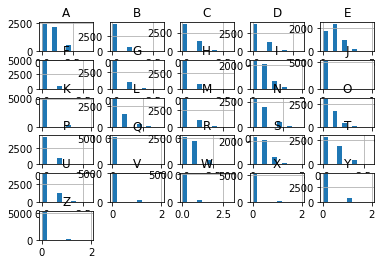

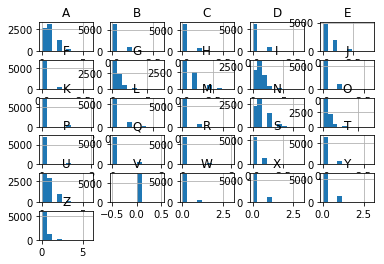

In [9]:
# Code used to generate the histograms
dataset_it.hist()
dataset_en.hist()
dataset_zh.hist()

pyplot.show()

In [10]:
array = dataset.values
X = array[:,0:26]
Y = array[:,26]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=validation_size, random_state=seed, shuffle=True)

In [11]:
models=[]
models.append(('LR', LogisticRegression(multi_class='auto', solver='liblinear')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))
#models.append(('MLP', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30,10), random_state=3)))

In [12]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.786885 (0.009271)
LDA: 0.774308 (0.005538)
KNN: 0.740793 (0.008171)
CART: 0.704719 (0.008190)
NB: 0.691453 (0.013798)
SVM: 0.831181 (0.011519)


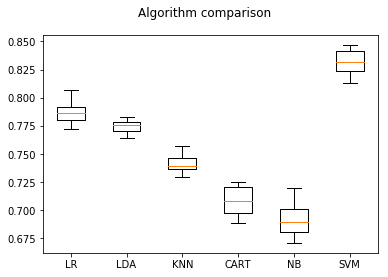

In [14]:
# Code used to generate the boxplots 
fig = pyplot.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
ax.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [15]:
model = SVC(gamma='scale', probability=True)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [94]:
model_name = str(model).split('(')[0]
print("Model:",model_name,"\n")
print("Accuracy score:\n",accuracy_score(Y_validation, predictions))
print("\n\nConfusion matrix:\n")
data = {'y_Predicted': predictions,
        'y_Actual':    Y_validation
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
print("\n\nClassification report:\n",classification_report(Y_validation, predictions))

Model: SVC 

Accuracy score:
 0.8366500829187397


Confusion matrix:

Predicted  Chinese  English  Italian
Actual                              
Chinese       1429       31       31
English         84      698      258
Italian         51      136      900


Classification report:
               precision    recall  f1-score   support

     Chinese       0.91      0.96      0.94      1491
     English       0.81      0.67      0.73      1040
     Italian       0.76      0.83      0.79      1087

   micro avg       0.84      0.84      0.84      3618
   macro avg       0.83      0.82      0.82      3618
weighted avg       0.84      0.84      0.83      3618



In [16]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
print("Saved", model)

Saved SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [17]:
filename = 'finalized_model.sav'
model = pickle.load(open(filename, 'rb'))
print("Loaded", model)

Loaded SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [19]:
test_string = "你好，世界"

classes = ["Chinese","English", "Italian"]

predictions = model.predict_proba([parse_string(test_string)]).tolist()[0]
best_guess = predictions.index(max(predictions))

print("The word", "\"\x1b[31m"+test_string+"\x1b[0m\"",  "was classified as", "\x1b[31m"+ classes[best_guess] +"\x1b[0m")
for i in range (0,3):
    print("\t"+classes[i]+":",round(predictions[i]*100, 3),"%")

The word "你好，世界" was classified as Chinese
	Chinese: 95.757 %
	English: 3.662 %
	Italian: 0.581 %
